IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

READING AND UNDERSTANDING DATA

In [4]:
data=pd.read_csv("C:\\Users\\hsing\\Downloads\\Titanice\\tested.csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data.shape

(418, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

we see that there are 86 null values in Age and 327 null values in cabin.

In [11]:
data.PassengerId.unique().shape

(418,)

In [12]:
data=data.drop(columns='PassengerId')

In [13]:
data.Survived.value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [14]:
data.Pclass.value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

DATA VISUALIZATION

Text(0, 0.5, 'count')

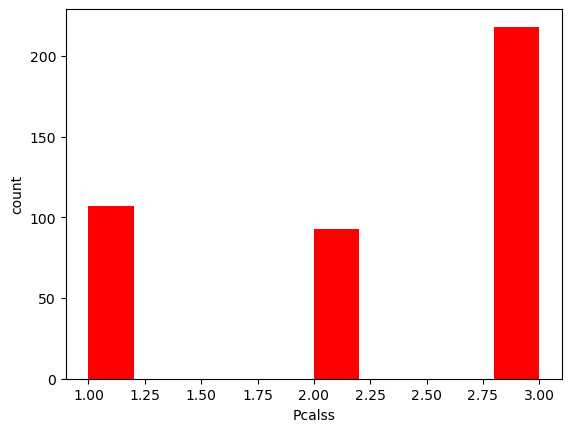

In [16]:
plt.hist(data.Pclass,color='red')
plt.xlabel('Pcalss')
plt.ylabel('count')

<Axes: xlabel='Pclass', ylabel='count'>

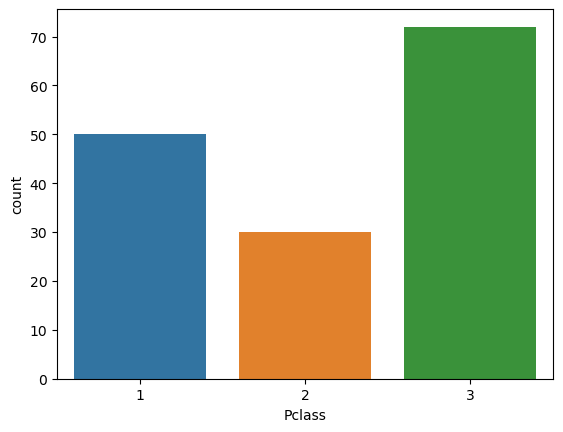

In [17]:
sns.countplot(data[data['Survived']==1],x='Pclass')

<Axes: xlabel='Survived', ylabel='Age'>

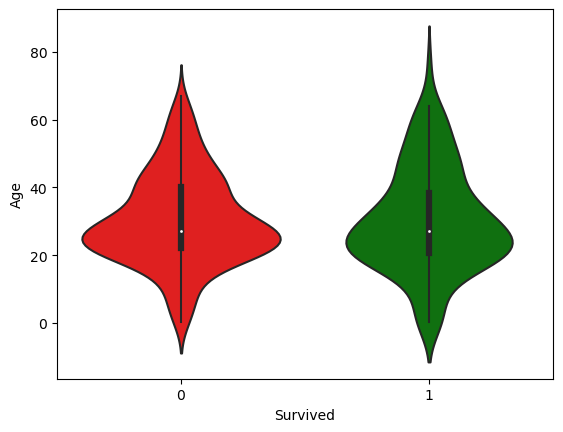

In [18]:
sns.violinplot(data,x='Survived',y='Age',palette=['red','green'])

In [19]:
data.groupby('Survived').Age.mean()

Survived
0    30.272732
1    30.272362
Name: Age, dtype: float64

<Axes: xlabel='Survived', ylabel='Age'>

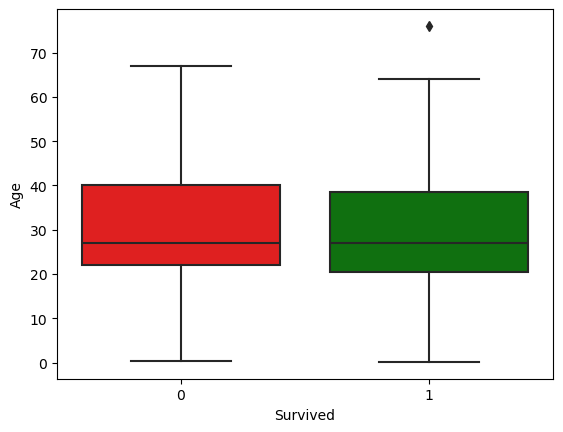

In [20]:
sns.boxplot(data,x='Survived',y='Age',palette=['red','green'])

In [21]:
data['First_Name'] = data['Name'].str.split(',').str[0]

In [31]:
data=data.drop(columns='Name')

In [41]:
Name_counts=data.First_Name.value_counts()

In [43]:
Name_counts['Davies']

4

(array([299.,   0.,   0.,  45.,   0.,   0.,   3.,   0.,   0.,   5.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

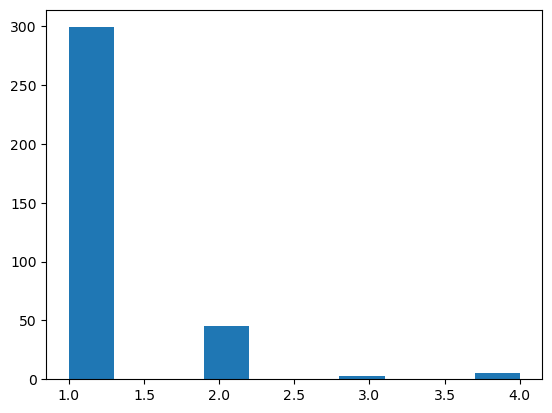

In [45]:
plt.hist(pd.DataFrame(Name_counts))

In [47]:
data=data.drop(columns='First_Name')

In [49]:
data.Sex.value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [51]:
data.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           152
male    0           266
Name: count, dtype: int64

In [53]:
data.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Embarked', ylabel='Count'>

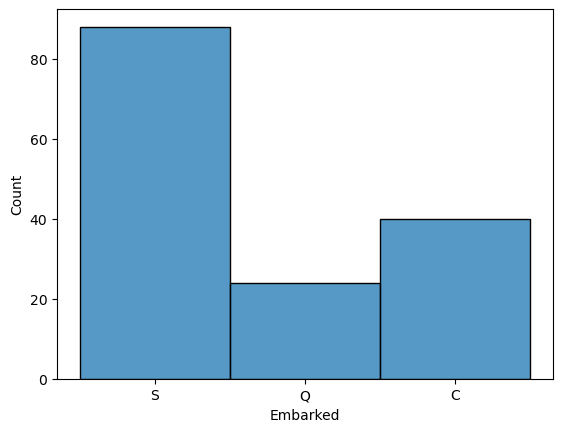

In [55]:
sns.histplot(data[data['Survived']==1],x='Embarked')

In [57]:
data=data.drop(columns='Cabin')

In [59]:
data.Age.mean()

30.272590361445783

In [61]:
data['Age']=data.Age.fillna(data.Age.mean())

In [63]:
data.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [65]:
data[data['Fare']>100].shape

(31, 9)

In [67]:
data['Fare']=data['Fare'].apply(lambda x : 100 if x >100 else x)


In [69]:
data['Fare']=data.Fare.fillna(data.Fare.mean())

In [71]:
data.groupby('Survived').Fare.mean()

Survived
0    23.522320
1    35.342928
Name: Fare, dtype: float64

In [73]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [75]:
data.Parch.value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

In [77]:
data[data['Parch']!=0].Survived.mean()

0.5638297872340425

In [79]:
data['Parch']=data['Parch'].apply(lambda x : 0 if x ==0 else 1)

In [81]:
data.groupby('Parch').Survived.mean()

Parch
0    0.305556
1    0.563830
Name: Survived, dtype: float64

In [83]:
data.SibSp.value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [85]:
data[data['SibSp']!=1].Survived.value_counts()

Survived
0    210
1     98
Name: count, dtype: int64

In [87]:
data[data['SibSp']==0].Survived.value_counts()

Survived
0    195
1     88
Name: count, dtype: int64

In [89]:
data=data.drop(columns='Ticket')

In [91]:
Y=data['Survived']
X=data.drop(columns='Survived')

In [93]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score

In [94]:
print(X.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


LabelEncoder is used for the labels, in order to have labels for d categories replaced with integers from 1 to d.

In [96]:
le=LabelEncoder()
X['Sex']=le.fit_transform(X['Sex'])
X['Embarked']=le.fit_transform(X['Embarked'])

STANDARD-SCALER-StandardScaler must be used for the training and test data, not for the labels. It outputs positive or negative float.

In [101]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X)

In [103]:
Y=pd.DataFrame(Y)

In [104]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=45)

DECISION TREE CLASSIFIER

In [108]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Accuracy score:', accuracy_score(y_pred,Y_test)*100)
print('precision score:', precision_score(y_pred,Y_test)*100)
print('confusion matrix',confusion_matrix(y_pred,Y_test))
print('classification report',classification_report(y_pred,Y_test))

Accuracy score: 100.0
precision score: 100.0
confusion matrix [[103   0]
 [  0  65]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        65

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



LOGISTIC REGRESSION

In [111]:
model=LogisticRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Accuracy score:', accuracy_score(y_pred,Y_test)*100)
print('precision score:', precision_score(y_pred,Y_test)*100)
print('confusion matrix',confusion_matrix(y_pred,Y_test))
print('classification report',classification_report(y_pred,Y_test))

Accuracy score: 100.0
precision score: 100.0
confusion matrix [[103   0]
 [  0  65]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        65

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SUPPORT VECTOR CLASSIFIER

In [114]:
model=SVC()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Accuracy score:', accuracy_score(y_pred,Y_test)*100)
print('precision score:', precision_score(y_pred,Y_test)*100)
print('confusion matrix',confusion_matrix(y_pred,Y_test))
print('classification report',classification_report(y_pred,Y_test))

Accuracy score: 100.0
precision score: 100.0
confusion matrix [[103   0]
 [  0  65]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        65

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RANDOM FOREST CLASSIFIER

In [117]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Accuracy score:', accuracy_score(y_pred,Y_test)*100)
print('precision score:', precision_score(y_pred,Y_test)*100)
print('confusion matrix',confusion_matrix(y_pred,Y_test))
print('classification report',classification_report(y_pred,Y_test))

Accuracy score: 100.0
precision score: 100.0
confusion matrix [[103   0]
 [  0  65]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        65

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



C:\Users\hsing\AppData\Local\Temp\ipykernel_19500\3806694953.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


K-NEIGHBORS CLASSIFIER

In [120]:
model=KNeighborsClassifier()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Accuracy score:', accuracy_score(y_pred,Y_test)*100)
print('precision score:', precision_score(y_pred,Y_test)*100)
print('confusion matrix',confusion_matrix(y_pred,Y_test))
print('classification report',classification_report(y_pred,Y_test))

Accuracy score: 98.21428571428571
precision score: 98.46153846153847
confusion matrix [[101   1]
 [  2  64]]
classification report               precision    recall  f1-score   support

           0       0.98      0.99      0.99       102
           1       0.98      0.97      0.98        66

    accuracy                           0.98       168
   macro avg       0.98      0.98      0.98       168
weighted avg       0.98      0.98      0.98       168



E:\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


We perform Chi-square test on categorical variables. Let's perform chi2 test on two categorical variables in titanic data set i.e Survived and Pclass.

In [123]:
from scipy.stats import chi2_contingency
contigency_table=pd.crosstab(data['Survived'],data['Pclass'])
chi2,p,data,expected=chi2_contingency(contigency_table)
print(p)

0.03519206276590605


In [125]:
if p<0.05:
    print(p,"Reject Null Hypothesis,There is a significant association between Survived and Pclass.")
else:
    print(p,"Accept Null Hypothesis,There is no significant association between Survived and Pclass.")

0.03519206276590605 Reject Null Hypothesis,There is a significant association between Survived and Pclass.
